**California House Price Prediction Project**

In this project, I will prework on developing a machine learning project using linear regression. Here, I will implement the model by myself. Later, I will use scikit learn. Moreover, I will perform extensive data visualization, data feature engineering and select features based on the correlation of the features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Manual implementation of Linear Regression **

In [2]:
from sklearn.datasets import fetch_california_housing
load_california = fetch_california_housing()
X = load_california.data
y = load_california.target
data = pd.DataFrame(X, columns = load_california.feature_names)
data["Saleprice"] = y
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Saleprice  
0    -122.23      4.526  
1    -122.22      3.585  
2    -122.24      3.521  
3    -122.25      3.413  
4    -122.25      3.422

In [6]:
data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude     Saleprice  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

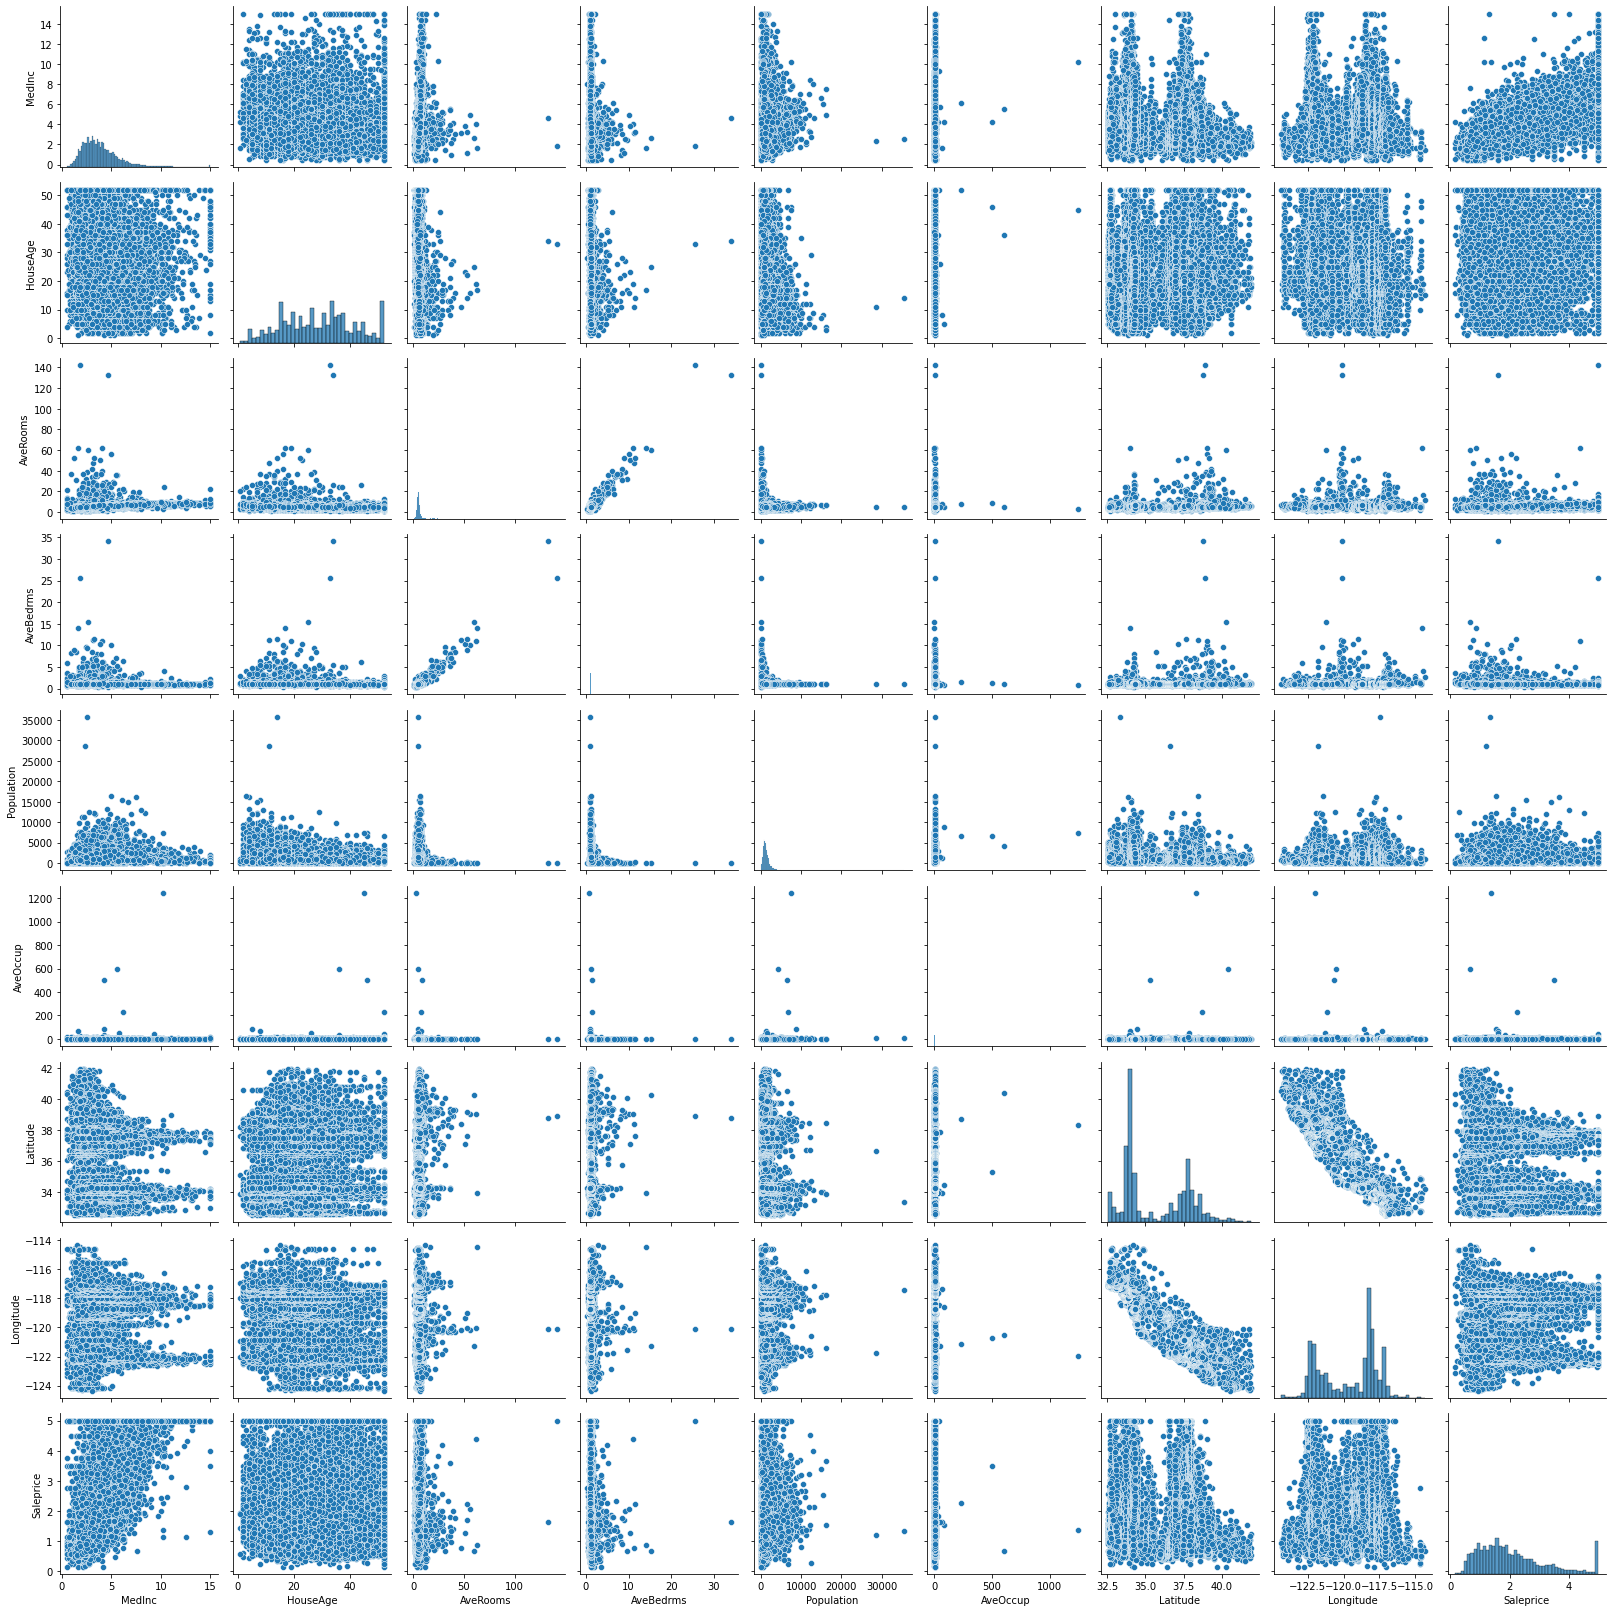

In [5]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


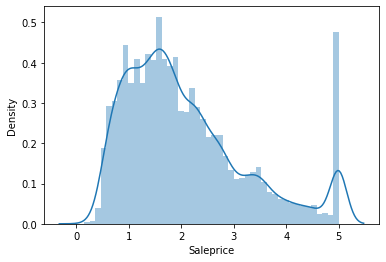

In [7]:
sns.distplot(data["Saleprice"])

In [8]:
print("Skewness = ", data["Saleprice"].skew())
print("Kurtosis = ", data["Saleprice"].kurt())

Skewness =  0.9777632739098345
Kurtosis =  0.3278702429465876


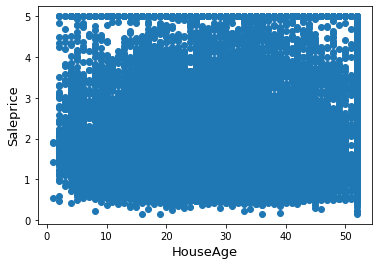

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = data["HouseAge"], y = data["Saleprice"])
plt.ylabel("Saleprice", fontsize=13)
plt.xlabel("HouseAge", fontsize=13)
plt.show()

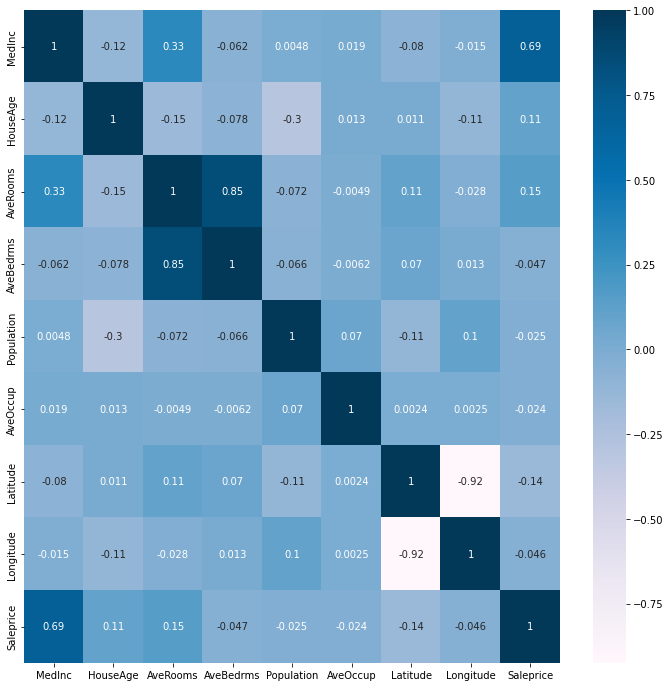

In [10]:
plt.figure(figsize=(12,12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [11]:
cor_target = abs(cor["Saleprice"])
relevant_feature = cor_target[cor_target > 0.1]
names = [index for index, value in relevant_feature.iteritems()]
names.remove("Saleprice")
print(names)


['MedInc', 'HouseAge', 'AveRooms', 'Latitude']


In [12]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']].copy()
X['intercept'] = 1
X = X[['intercept', 'MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
X

intercept  MedInc  HouseAge  AveRooms  Latitude
0              1  8.3252      41.0  6.984127     37.88
1              1  8.3014      21.0  6.238137     37.86
2              1  7.2574      52.0  8.288136     37.85
3              1  5.6431      52.0  5.817352     37.85
4              1  3.8462      52.0  6.281853     37.85
...          ...     ...       ...       ...       ...
20635          1  1.5603      25.0  5.045455     39.48
20636          1  2.5568      18.0  6.114035     39.49
20637          1  1.7000      17.0  5.205543     39.43
20638          1  1.8672      18.0  5.329513     39.43
20639          1  2.3886      16.0  5.254717     39.37

[20640 rows x 5 columns]

In [13]:
X_T = X.T
X_T

0          1          2          3          4          5      \
intercept   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
MedInc      8.325200   8.301400   7.257400   5.643100   3.846200   4.036800   
HouseAge   41.000000  21.000000  52.000000  52.000000  52.000000  52.000000   
AveRooms    6.984127   6.238137   8.288136   5.817352   6.281853   4.761658   
Latitude   37.880000  37.860000  37.850000  37.850000  37.850000  37.850000   

               6          7          8          9      ...      20630  \
intercept   1.000000   1.000000   1.000000   1.000000  ...   1.000000   
MedInc      3.659100   3.120000   2.080400   3.691200  ...   3.567300   
HouseAge   52.000000  52.000000  42.000000  52.000000  ...  11.000000   
AveRooms    4.931907   4.797527   4.294118   4.970588  ...   5.932584   
Latitude   37.840000  37.840000  37.840000  37.840000  ...  39.290000   

               20631      20632      20633     20634      20635      20636  \
intercept   1.000000   1.000000   1.000000   1.00000   1.000000   1.000000   
MedInc      3.517900   3.125000   2.549500   3.71250   1.560300   2.556800   
HouseAge   15.000000  15.000000  27.000000  28.00000  25.000000  18.000000   
AveRooms    6.145833   6.023377   5.445026   6.77907   5.045455   6.114035   
Latitude   39.330000  39.260000  39.190000  39.27000  39.480000  39.490000   

               20637      20638      20639  
intercept   1.000000   1.000000   1.000000  
MedInc      1.700000   1.867200   2.388600  
HouseAge   17.000000  18.000000  16.000000  
AveRooms    5.205543   5.329513   5.254717  
Latitude   39.430000  39.430000  39.370000  

[5 rows x 20640 columns]

In [14]:
B = np.linalg.inv(X_T @ X) @ X_T @ y
B

0    1.627256
1    0.436289
2    0.016970
3   -0.021242
4   -0.045412
dtype: float64

In [15]:
B.index = X.columns
B

intercept    1.627256
MedInc       0.436289
HouseAge     0.016970
AveRooms    -0.021242
Latitude    -0.045412
dtype: float64

In [16]:
predictions = X @ B
predictions

0        4.086649
1        3.753621
2        3.781113
3        3.129296
4        2.335463
           ...   
20635    0.832203
20636    1.125022
20637    0.756263
20638    0.843547
20639    1.041401
Length: 20640, dtype: float64

In [17]:
SSR = ((y - predictions) ** 2).sum()
SST = ((y-y.mean()) ** 2).sum()
print("SSR = ", SSR)
print("SST = ", SST)

SSR =  13219.938347912746
SST =  27483.19819368851


In [18]:
r2 = 1 - (SSR/SST)
r2

0.5189810787396392

**Linear Regression using scikit learn Model**

In [19]:
from sklearn.model_selection import train_test_split
X = data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
y = data["Saleprice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 4)
(4128, 4)
(16512,)
(4128,)


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
predictions = lr.predict(X_test)
print("Actual value of the house = ", y_test[0])
print("Predicted value of the house = ", predictions[0])

Actual value of the house =  4.526
Predicted value of the house =  1.0549844702419482


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.6495475488975627
0.8059451277212133


In [29]:
print('Intercept = ', lr.intercept_)
print('Coefficient = ', lr.coef_)
print('Score = ', lr.score(X_test, y_test))

Intercept =  1.619088341025227
Coefficient =  [ 0.43829835  0.01695058 -0.02183427 -0.04529124]
Score =  0.5043169272470043


Both the manual implementation and sklearn model returns the accuracy closer to 0.5 